## TEST 4
### KARTIK THAKUR


#### Show all these data in graphs
### a) which type i.e movie or tv show is higher in number
### b) in which year maximum number of tv shows or movies released
### c) in which month percentage of movies and tv shows are maximum

In [1]:
# FIRST IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
# IMPORTING THE CSV FILE OF NETFLIX 

In [3]:
netflix = pd.read_csv('netflix_titles.csv')

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
netflix.info()   # total rows  --7787 and columns -12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5396 non-null   object
 4   cast          7067 non-null   object
 5   country       7276 non-null   object
 6   date_added    7776 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Data cleaning 

In [8]:
# checking the null values

In [9]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2391
cast             720
country          511
date_added        11
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
netflix.dropna(inplace=True)

### It seems our data has no null values now.

In [11]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
####


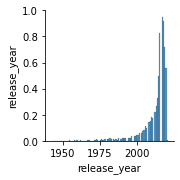

In [13]:
sns.pairplot(netflix)

## QUESTION AND ANSWER . 
## A WHICH AS HIGEST NUMMBER , THE ANSWER FOR IT IS MOVIES AT 4000 ABOVE

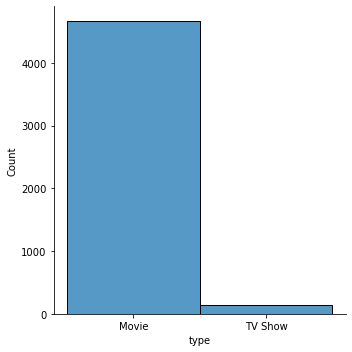

In [14]:

sns.displot(data=netflix['type'])

The graph shows the the movie production surpasses TV shows production by a great margin 

# B, IN WHICH YEAR MAX TV SHOW OR MOVIES WERE RELEASED

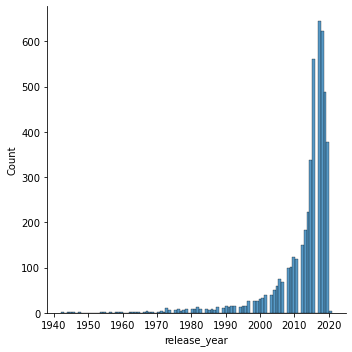

In [15]:
sns.displot(data=netflix['release_year'])

<AxesSubplot:xlabel='type', ylabel='release_year'>

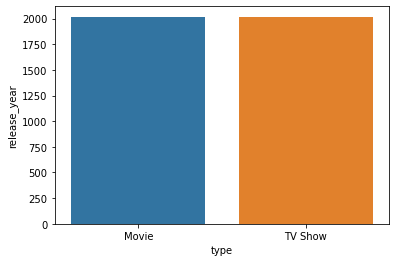

In [16]:
sns.barplot(data=netflix,x='type',y='release_year')

# C , IN WHICH MONTH THE HAS THE HIGHEST REALEASE OF TV SHOW AND MOVIES

In [17]:
netflix['date_added'].dtype

dtype('O')

In [18]:
netflix['month'] = netflix['date_added'].str.split().str[0]
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December


In [19]:
month_counts = netflix.groupby('month').size().sort_values(ascending=False)
movies_month = month_counts.index[0]
movies_month 


'January'

# hence, jaunary has highest movie release

In [20]:
# droping the data columns for model training , droping not requried columns

In [53]:
netflix_train=netflix.drop(['show_id','title','date_added','description','cast','type','director'],axis=1)

In [54]:
netflix_train

,country,release_year,rating,duration,listed_in,month
1,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",December
2,Singapore,2011,R,78 min,"Horror Movies, International Movies",December
3,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November
4,United States,2008,PG-13,123 min,Dramas,January
5,Turkey,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",July
...,...,...,...,...,...,...
7778,United States,2009,R,88 min,"Comedies, Horror Movies",November
7780,India,2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",July
7781,United States,2006,PG,88 min,"Children & Family Movies, Comedies",January
7782,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min,"Dramas, International Movies",October


# preparing the data for model training

In [55]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [56]:
y=netflix['type']

In [57]:
a={'Movie':0,'TV Show':1}
y=y.map(a)

In [58]:
y

1       0
2       0
3       0
4       0
5       1
       ..
7778    0
7780    0
7781    0
7782    0
7783    0
Name: type, Length: 4801, dtype: int64

In [59]:
encoded=OneHotEncoder()

In [60]:
encoded_country=encoded.fit_transform(netflix_train[['country']])
encoded_release_year=encoded.fit_transform(netflix_train[['release_year']])
encoded_rating=encoded.fit_transform(netflix_train[['rating']]).toarray()
encoded_listed_in=encoded.fit_transform(netflix_train[['listed_in']])
encoded_month=encoded.fit_transform(netflix_train[['month']])

In [67]:
le = LabelEncoder()
df_encoded=pd.DataFrame()
df_encoded['country'] = le.fit_transform(netflix_train['country'])

In [70]:
df_encoded['release_year'] = le.fit_transform(netflix_train['release_year'])

In [72]:
df_encoded['duration'] = le.fit_transform(netflix_train['duration'])

In [75]:
df_encoded['rating'] = le.fit_transform(netflix_train['rating'])

In [78]:
x=df_encoded

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_)

,0
0,188
1,170
2,174
3,25
4,0
...,...
4796,182
4797,189
4798,182
4799,194


## QUESTION AND ANSWERS

a) which type i.e movie or tv show is higher in number